In [1]:
from zipfile import ZipFile
import os

zip_file_path = 'women-fashion.zip'
extraction_directory = 'womens-fashion'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

['women fashion', '__MACOSX']


(['.DS_Store',
  'anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
  'Anarkali suit with a modern twist.jpg',
  'Anarkali suit with fitted bodice with a high neckline.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
  'anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg',
  'anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'black and white gingham checkered A-line dress with a flared skirt.jpg'],
 97)

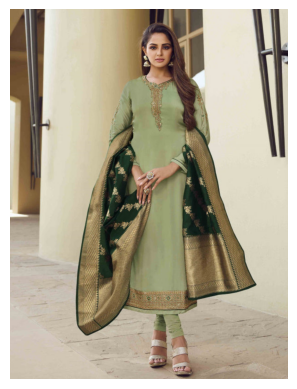

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[1])
display_image(first_image_path)

In [10]:
import glob
import os

image_directory = 'womens-fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '**', '*.*'), recursive=True) 
                    if file.lower().endswith(('.jpg', '.png', '.jpeg', '.webp'))]

print(image_paths_list)

['womens-fashion\\women fashion\\anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg', 'womens-fashion\\women fashion\\Anarkali suit with a modern twist.jpg', 'womens-fashion\\women fashion\\Anarkali suit with fitted bodice with a high neckline.jpg', 'womens-fashion\\women fashion\\anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'womens-fashion\\women fashion\\anarkali suit with lavender in color with intricate white patterns throughout the fabric.jpg', 'womens-fashion\\women fashion\\anarkali suit. It consists of a turquoise skirt with detailed golden embroidery, a multicolored blouse with floral patterns, and an orange dupatta with lace borders.jpg', 'womens-fashion\\women fashion\\ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'womens-fashion\\women fashion\\beige top adorned with black dots and a green skirt.jpg'

In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 [==============================] - 0s 83ms/step


In [24]:
from scipy.spatial.distance import cosine
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):

    input_image_filename = os.path.basename(input_image_path)

    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    if input_image_filename in all_image_names:
        input_idx = all_image_names.index(input_image_filename)
        similar_indices = [idx for idx in similar_indices if idx != input_idx]

    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join(extraction_directory_updated, all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 81ms/step


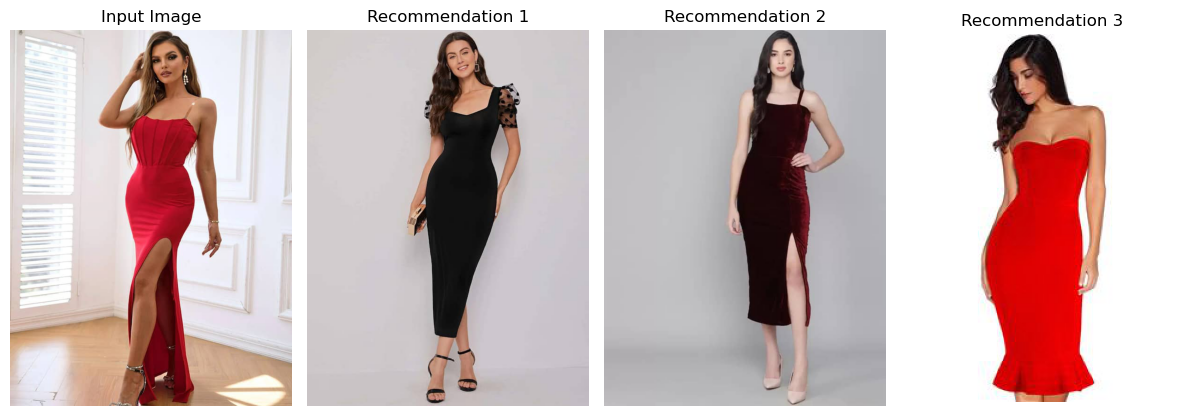

In [26]:
input_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[22])
recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=4)